# Importing packages

In [123]:
import yfinance as yf
import numpy as np
import scipy as sp
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.arima_process import ArmaProcess
from tabulate import tabulate
from statsmodels.tsa.stattools import adfuller, kpss, acf, acovf, pacf

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.tools.eval_measures import rmse, meanabs

import seaborn as sns
from statsmodels.stats.diagnostic import het_arch
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Importing the dataset from yahoo finance

In [219]:
NASDAQ = pd.read_csv('NASDAQ_DAILY_1971_2025.txt')
print(NASDAQ.head())
NASDAQ.dtypes

         Date   Adj Close
0  1971-02-05  100.000000
1  1971-02-08  100.839996
2  1971-02-09  100.760002
3  1971-02-10  100.690002
4  1971-02-11  101.449997


Date          object
Adj Close    float64
dtype: object

In [220]:
NASDAQ['Date'] = pd.to_datetime(NASDAQ['Date'])
NASDAQ.head()
NASDAQ.dtypes
NSDQ = NASDAQ[['Adj Close']]

In [221]:
# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(NSDQ)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | 3.9702479870464216            |
| P-valeur       | 1.0                           |
| Conclusion     | La série est non stationnaire |


In [222]:
NASDAQ['LN_NASDAQ'] = (np.log(NASDAQ['Adj Close'] / NASDAQ['Adj Close'].shift(1)))*100

print(NASDAQ.head())

        Date   Adj Close  LN_NASDAQ
0 1971-02-05  100.000000        NaN
1 1971-02-08  100.839996   0.836488
2 1971-02-09  100.760002  -0.079359
3 1971-02-10  100.690002  -0.069496
4 1971-02-11  101.449997   0.751952


In [223]:
NASDAQ.dropna().head()

,Date,Adj Close,LN_NASDAQ
1,1971-02-08,100.839996,0.836488
2,1971-02-09,100.760002,-0.079359
3,1971-02-10,100.690002,-0.069496
4,1971-02-11,101.449997,0.751952
5,1971-02-12,102.050003,0.589688


In [224]:
# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(NASDAQ['LN_NASDAQ'].dropna())

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -17.880382292359585       |
| P-valeur       | 3.0039796568725135e-30    |
| Conclusion     | La série est stationnaire |


# Graph of the dataset

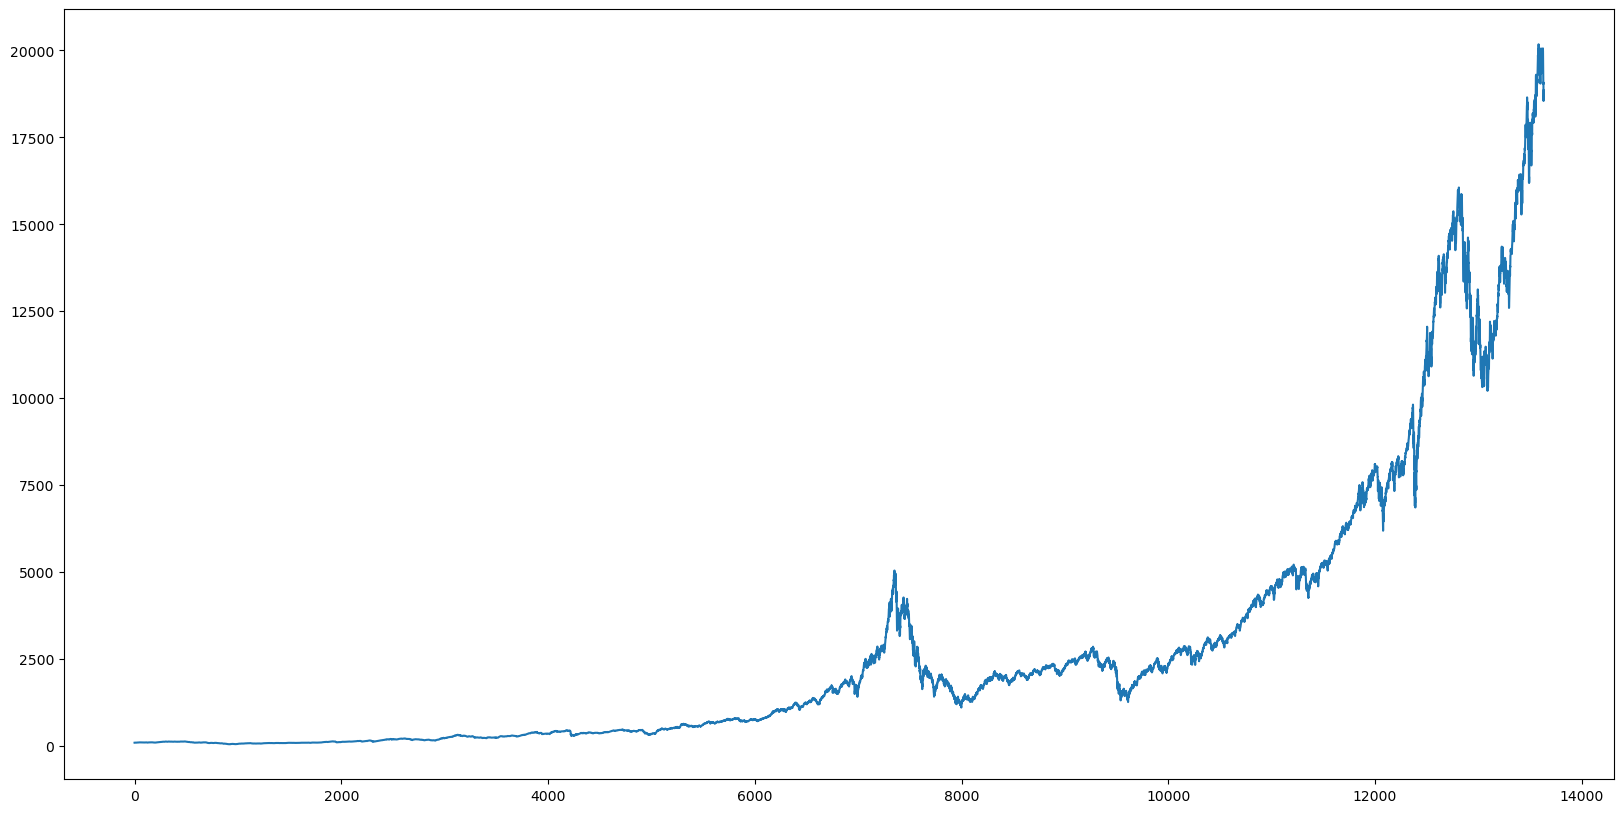

In [228]:
plt.rcParams['figure.figsize'] = (20,10)
NASDAQ['Adj Close'].plot()
plt.show()

# Plotting the autocorrelation function 

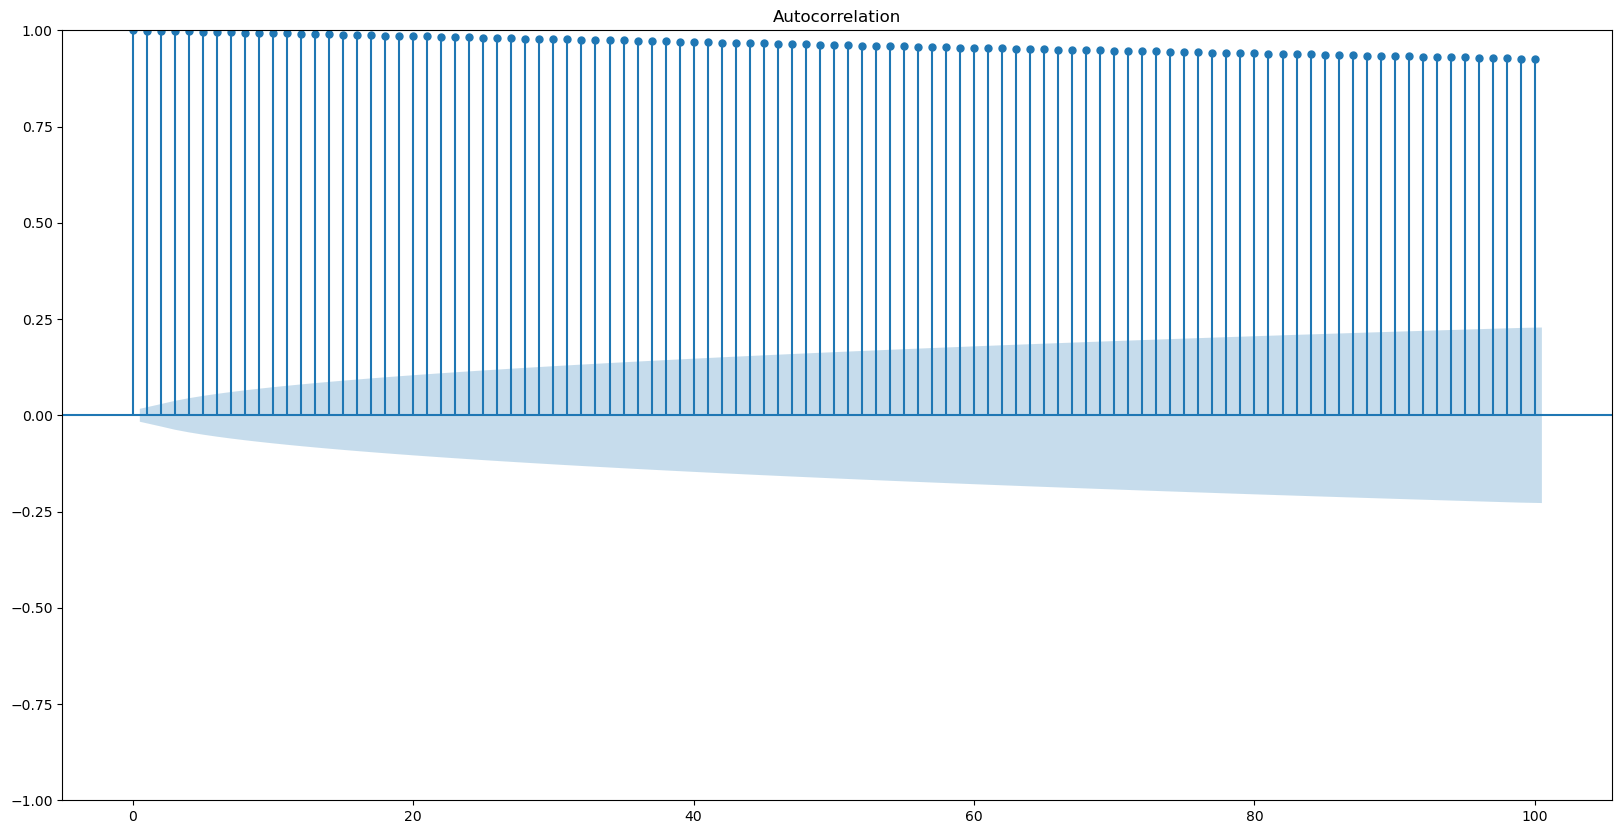

In [79]:
plt.rcParams['figure.figsize'] = (20,10)

    # Dans lags on  met chiffre de sorte a le moment où l'autocorrelation s'annule

plot_acf(NSDQ, lags=100)

    # Affichage du graphique

plt.show()

# Plotting the partial autocorrelation function 

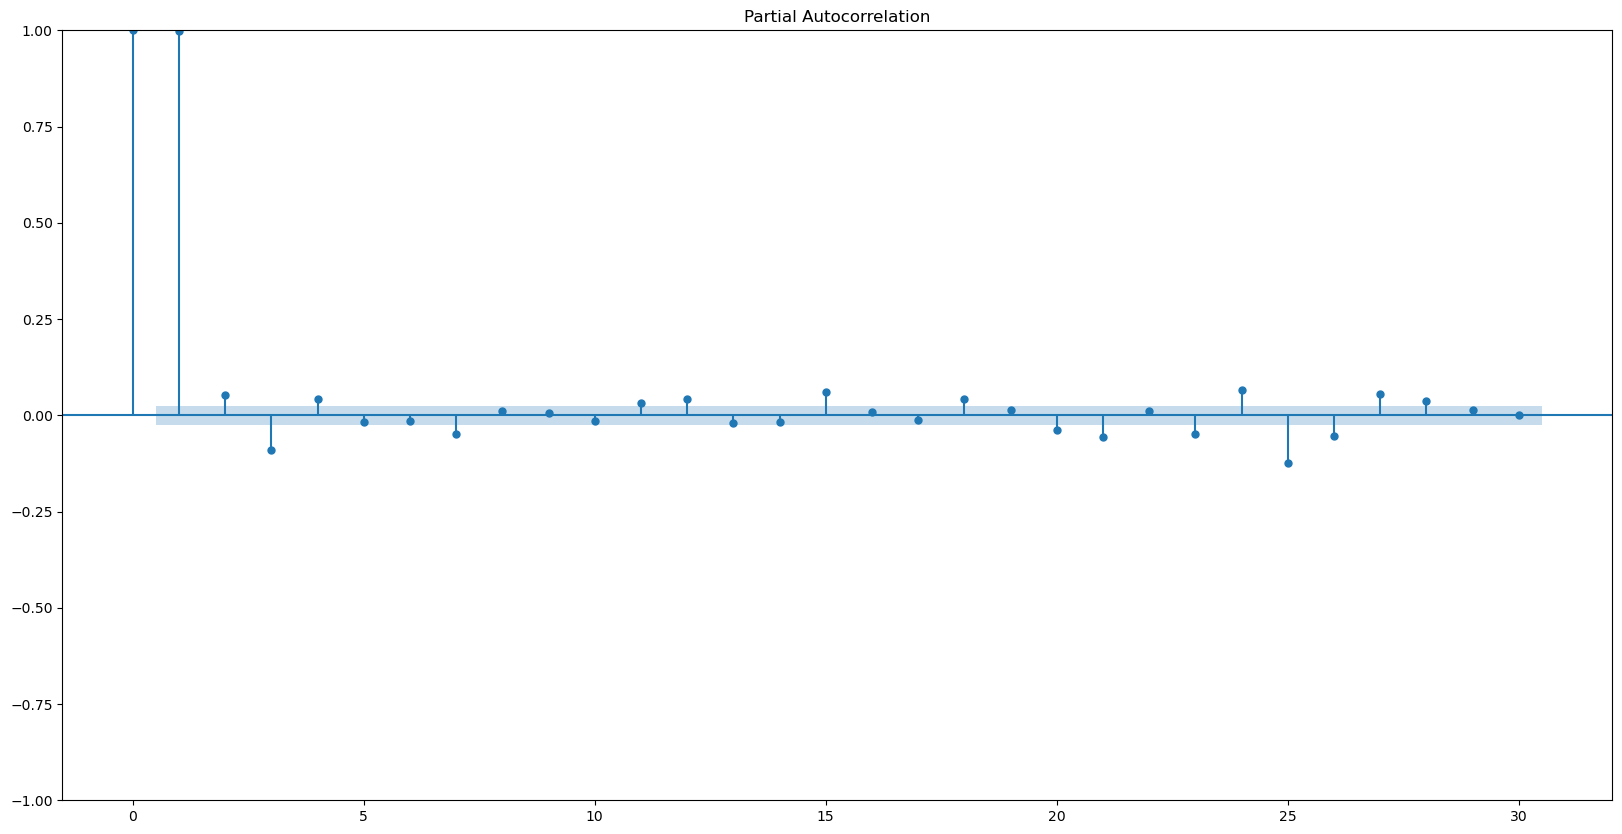

In [68]:
plt.rcParams['figure.figsize'] = (20,10)

plot_pacf(NSDQ, lags=30)
plt.show()

# Augmented Dickey Fuller test
    
   - $H_0$ : la série est non-stationnaire, c a d qu'elle contient au moins une racine unitaire
   - $H_1$ : la série est stationnaire, c a d qu'elle ne comporte pas de racine unitaire

Ainsi, contrairement aux règles de décisions habituelles pour les tests bilatéraux, la règle est inversée :

   - $stat_{test} < stat_{table}$ on ne rejette pas $H_0$ : la tendance/constante n'est pas significativement différente de 0 (non-stationnaire)
    
   - $stat_{test} > stat_{table}$ on rejette $H_0$: la tendance/constante est pas significativement différente de 0 (stationnaire)

- Valeurs critiques de la constante et de la tendance dans le test de Dickey-Fuller

<table>
    <col width="50">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <tr>
        <td colspan="1" style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black"><i>Modèle [2]</i></td>
        <td colspan="6" style="text-align: center;border-right: 2px solid black"><i>Modèle [3]</i></td>
    </tr>
    <tr>
        <td colspan="1" style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Constante</td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Constante</td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Trend</td>
    </tr>
    <tr style="text-align: center;border-bottom: 2px solid black">
        <td style="text-align: center;border-right: 2px solid black">T</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">100</td>
        <td style="text-align: center;border-right: 2px dotted black">3.22</td>
        <td style="text-align: center;border-right: 2px dotted black">2.54</td>
        <td style="text-align: center;border-right: 2px solid black">2.17</td>
        <td style="text-align: center;border-right: 2px dotted black">3.78</td>
        <td style="text-align: center;border-right: 2px dotted black">3.11</td>
        <td style="text-align: center;border-right: 2px solid black">2.73</td>
        <td style="text-align: center;border-right: 2px dotted black">3.53</td>
        <td style="text-align: center;border-right: 2px dotted black">2.79</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">250</td>
        <td style="text-align: center;border-right: 2px dotted black">3.19</td>
        <td style="text-align: center;border-right: 2px dotted black">2.53</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.74</td>
        <td style="text-align: center;border-right: 2px dotted black">3.09</td>
        <td style="text-align: center;border-right: 2px solid black">2.73</td>
        <td style="text-align: center;border-right: 2px dotted black">3.49</td>
        <td style="text-align: center;border-right: 2px dotted black">2.79</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">500</td>
        <td style="text-align: center;border-right: 2px dotted black">3.18</td>
        <td style="text-align: center;border-right: 2px dotted black">2.52</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.08</td>
        <td style="text-align: center;border-right: 2px solid black">2.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.48</td>
        <td style="text-align: center;border-right: 2px dotted black">2.78</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">$\infty$</td>
        <td style="text-align: center;border-right: 2px dotted black">3.18</td>
        <td style="text-align: center;border-right: 2px dotted black">2.52</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.71</td>
        <td style="text-align: center;border-right: 2px dotted black">3.08</td>
        <td style="text-align: center;border-right: 2px solid black">2.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.46</td>
        <td style="text-align: center;border-right: 2px dotted black">2.78</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
</table>
</span>

In [21]:
    # Modèle constante & tendance 'ct'
adf1 = adfuller(NSDQ, regression='ct', autolag='AIC', regresults=True)

    # Affichage des résultats
    
adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.091
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           0.000332
Time:                        22:49:50   Log-Likelihood:                -5289.9
No. Observations:                 788   AIC:                         1.059e+04
Df Residuals:                     785   BIC:                         1.060e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0167      0.005     -3.560      0.000      -0.026      -0.007
const        155.1535     50.957      3.045      0.002      55.126     255.181
x2             0.2261      0.056      4.002      0.000       0.115       0.337
==============================================================================
Omnibus:                       12.777   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.704
Skew:                          -0.160   Prob(JB):                     0.000143
Kurtosis:                       3.660   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
    # Modèle constante 'c'
    
adf1 = adfuller(NSDQ, regression='c', autolag='AIC', regresults=True)

    # Affichage des résultats

adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1640
Date:                Tue, 25 Feb 2025   Prob (F-statistic):              0.686
Time:                        22:50:08   Log-Likelihood:                -5297.9
No. Observations:                 788   AIC:                         1.060e+04
Df Residuals:                     786   BIC:                         1.061e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0011      0.003     -0.405      0.686      -0.006       0.004
const         19.3177     38.367      0.503      0.615     -55.997      94.632
==============================================================================
Omnibus:                       21.950   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.871
Skew:                          -0.306   Prob(JB):                     8.87e-07
Kurtosis:                       3.690   Cond. No.                     7.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
    # Modèle sans constante ni tendance 'n'

adf1 = adfuller(NSDQ, regression='n', autolag='AIC', regresults=True)

    # Affichage des résultats

adf1

(1.451898637428468,
 0.9634107290260212,
 {'1%': -2.5736856404749715,
  '5%': -1.9419897547900222,
  '10%': -1.6159142523262657},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1d55647f680>)

In [69]:
NSDQ = np.log(NSDQ[['Close']]/NSDQ[['Close']].shift(1))*100

In [70]:
LNSDQ = NSDQ.dropna()
LNSDQ['Close'].skew()

-0.5249557445710965

In [15]:
    # Modèle constante & tendance 'ct'
adf1 = adfuller(LNSDQ, regression='ct', autolag='AIC', regresults=True)

    # Affichage des résultats
    
adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     146.2
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           3.77e-44
Time:                        14:53:12   Log-Likelihood:                -437.15
No. Observations:                 282   AIC:                             880.3
Df Residuals:                     279   BIC:                             891.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0209      0.060    -17.097      0.000      -1.138      -0.903
const          0.1598      0.137      1.165      0.245      -0.110       0.430
x2            -0.0003      0.001     -0.377      0.707      -0.002       0.001
==============================================================================
Omnibus:                       20.048   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.088
Skew:                          -0.534   Prob(JB):                     2.16e-06
Kurtosis:                       4.040   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
    # Modèle constante 'c'
    
adf1 = adfuller(LNSDQ, regression='c', autolag='AIC', regresults=True)

    # Affichage des résultats

adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     293.1
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           1.88e-45
Time:                        14:53:12   Log-Likelihood:                -437.23
No. Observations:                 282   AIC:                             878.5
Df Residuals:                     280   BIC:                             885.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0205      0.060    -17.120      0.000      -1.138      -0.903
const          0.1150      0.068      1.680      0.094      -0.020       0.250
==============================================================================
Omnibus:                       20.541   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.972
Skew:                          -0.540   Prob(JB):                     1.39e-06
Kurtosis:                       4.062   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
    # Modèle sans constante ni tendance 'n'

adf1,pvalue,crit,regres = adfuller(LNSDQ, regression='n', regresults=True)

    # Affichage des résultats

pvalue

0.0

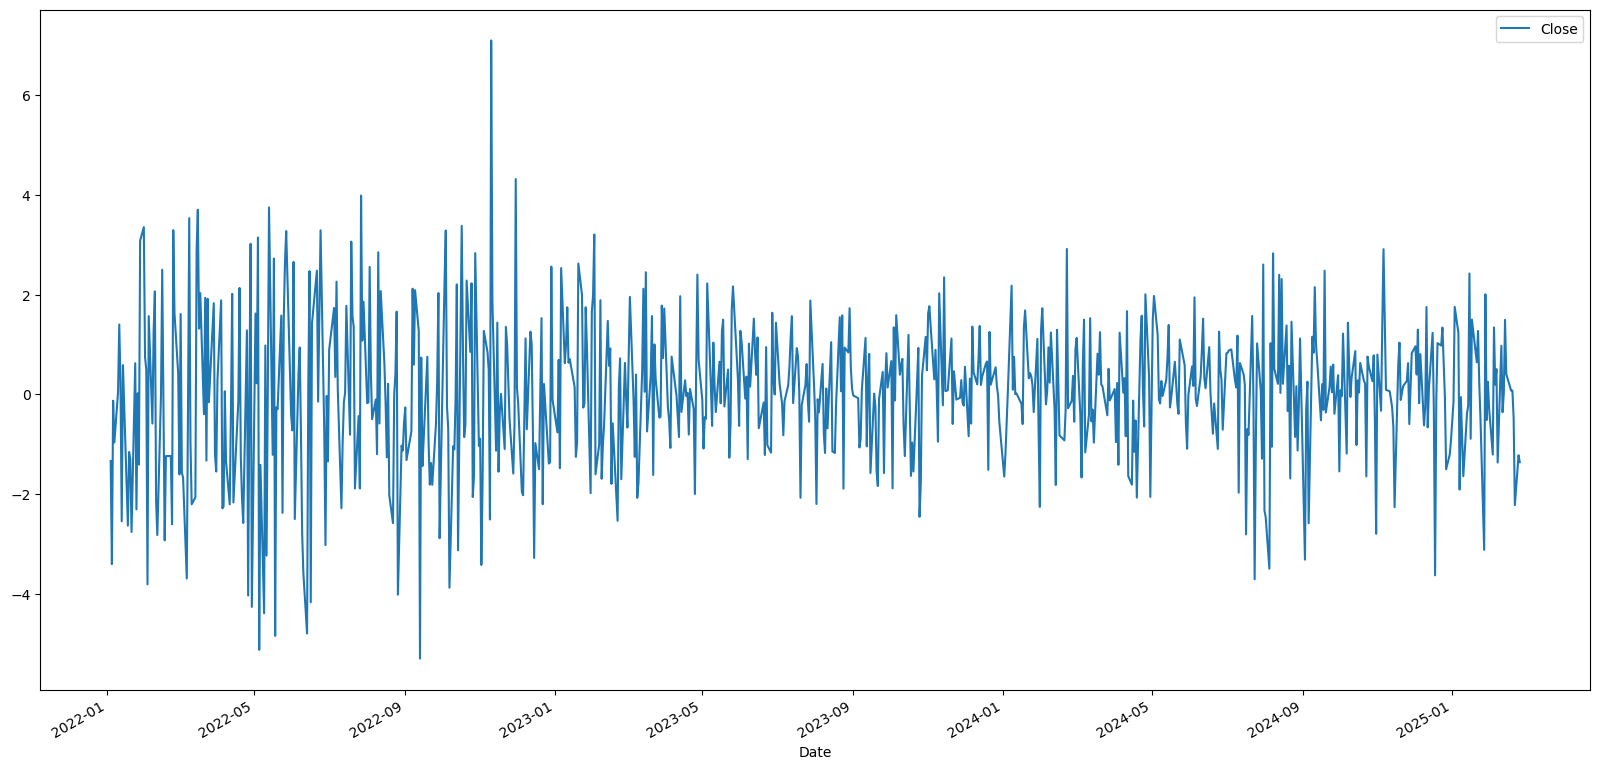

In [29]:
plt.rcParams['figure.figsize'] = (20,10)
LNSDQ.plot()
plt.show()

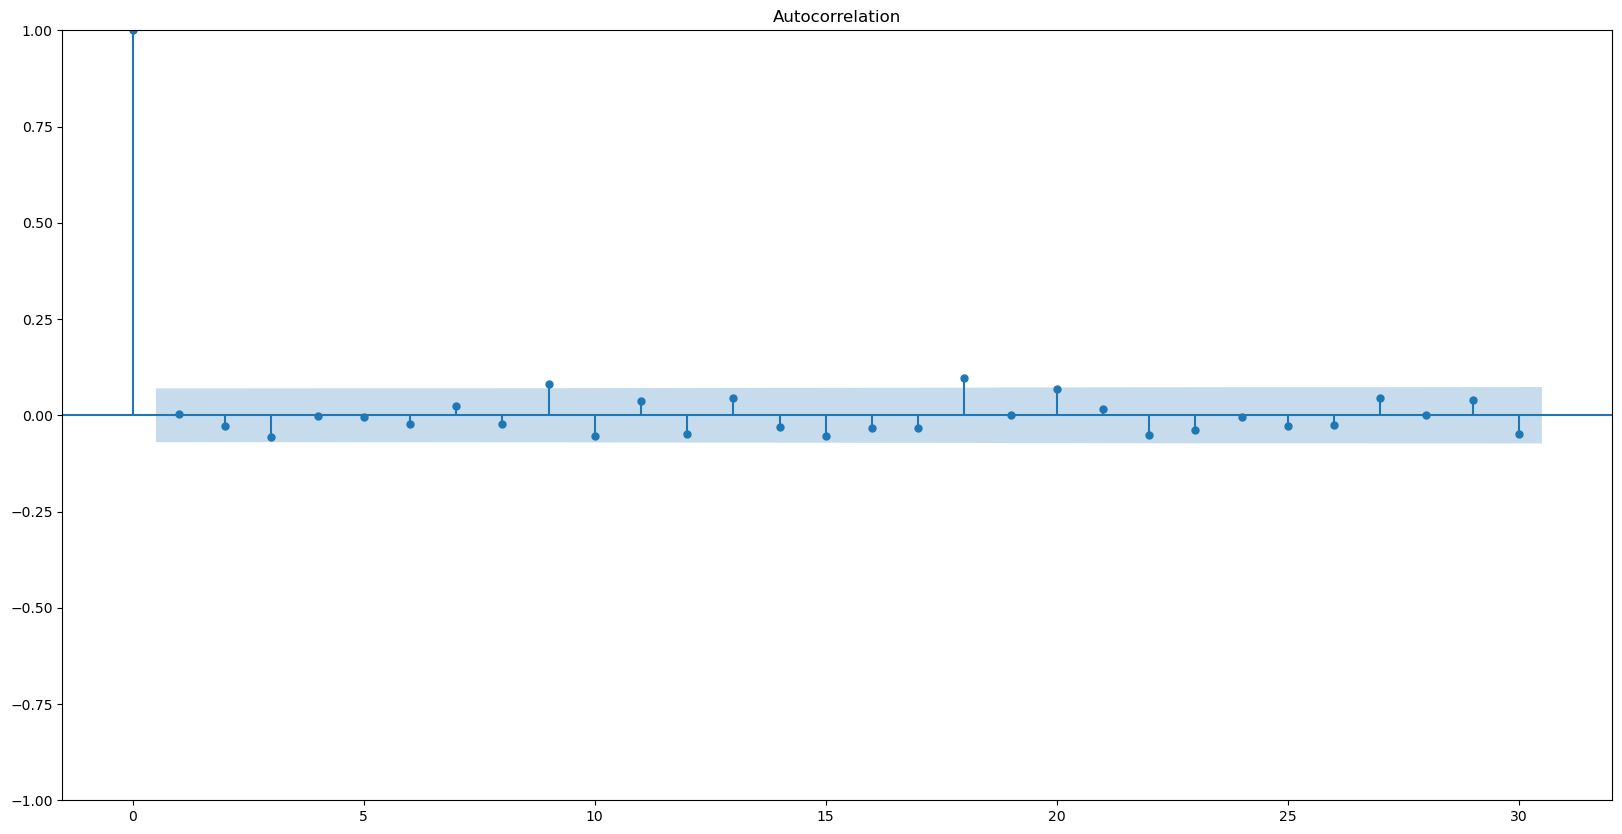

In [34]:
plt.rcParams['figure.figsize'] = (20,10)

    # Dans lags on  met chiffre de sorte a le moment où l'autocorrelation s'annule

plot_acf(LNSDQ, lags=30, alpha=.05)

    # Affichage du graphique

plt.show()

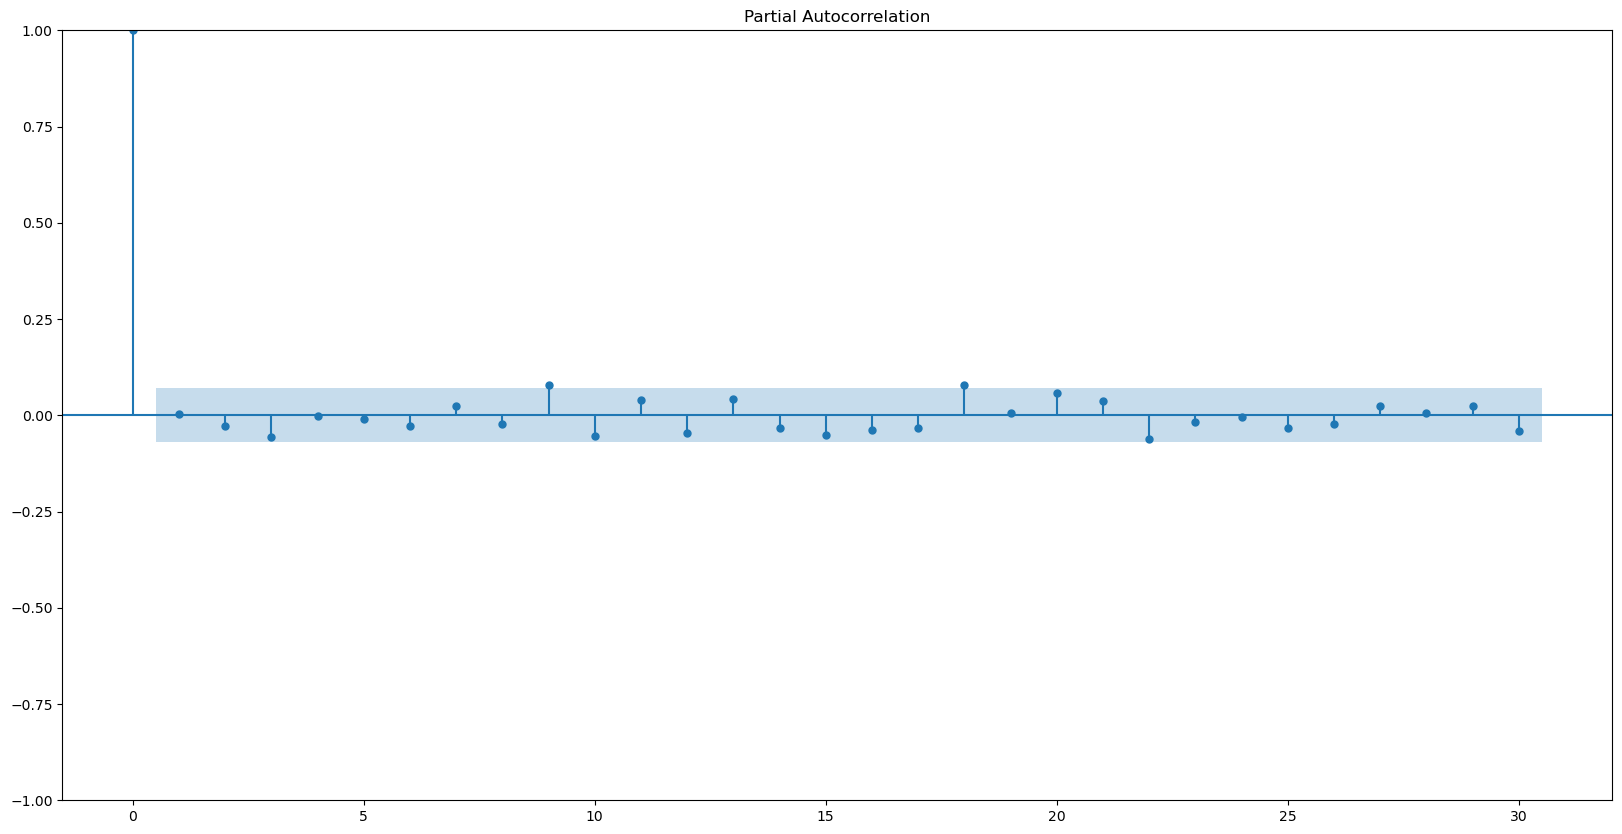

In [35]:
plt.rcParams['figure.figsize'] = (20,10)

    # Dans lags on  met chiffre de sorte a le moment où l'autocorrelation s'annule

plot_pacf(LNSDQ, lags=30,alpha=.05)

    # Affichage du graphique

plt.show()

In [37]:
coef_ac, confid_int = acf(LNSDQ, nlags=10, alpha=.05)
coef_ac

array([ 1.        ,  0.00205411, -0.02804325, -0.0565613 , -0.00173916,
       -0.00557316, -0.02322248,  0.0239892 , -0.02136799,  0.08051726,
       -0.05396258])

In [38]:
for q, element in enumerate(coef_ac):
    if confid_int[q, 0] <= 0 <= confid_int[q, 1]:
        print(q-1)
        break

0


In [46]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(LNSDQ)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -27.95978451365801        |
| P-valeur       | 0.0                       |
| Conclusion     | La série est stationnaire |


In [42]:
NSDQ

,Close
Date,
2022-01-03,NaN
2022-01-04,-1.335748
2022-01-05,-3.402025
2022-01-06,-0.127958
2022-01-07,-0.965868
...,...
2025-02-19,0.074769
2025-02-20,-0.469236
2025-02-21,-2.220349


In [48]:
pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 14.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [49]:
import pmdarima as pm

# Séparer les données en ensemble d'entraînement et ensemble de test
train_data = LNSDQ[:-15]
test_data = LNSDQ[-15:]

# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  773
Model:                        SARIMAX   Log Likelihood               -1398.930
Date:                Tue, 25 Feb 2025   AIC                           2799.860
Time:                        23:10:54   BIC                           2804.511
Sample:                             0   HQIC                          2801.650
                                - 773                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.1850      0.088     24.701      0.000       2.012       2.358
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                49.02
Prob(Q):                              0.99   Pr

In [52]:
model = pm.auto_arima(NSDQ['Close'].pct_change().dropna(), seasonal=False, stepwise=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  788
Model:                        SARIMAX   Log Likelihood                2207.296
Date:                Tue, 25 Feb 2025   AIC                          -4412.593
Time:                        23:15:38   BIC                          -4407.923
Sample:                             0   HQIC                         -4410.798
                                - 788                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002    8.6e-06     25.109      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                50.24
Prob(Q):                              0.97   Pr

In [53]:
print(model.order)  

(0, 0, 0)


In [54]:
data = NSDQ['Close'].pct_change().dropna()
result = adfuller(data)
print(f"Statistique de test : {result[0]}")
print(f"p-value : {result[1]}")

Statistique de test : -27.974250314314236
p-value : 0.0


In [55]:
p_value = het_arch(data)[1]
print(f"p-value du test ARCH : {p_value}")

p-value du test ARCH : 5.693512059867772e-12


In [56]:
from arch import arch_model
import numpy as np

data = NSDQ['Close'].pct_change().dropna()

best_aic = np.inf  # Initialise avec un AIC très grand
best_order = None
best_model = None

# Boucle sur plusieurs valeurs de (p, q)
for p in range(4):  # Tester p de 0 à 3
    for q in range(4):  # Tester q de 0 à 3
        try:
            model = arch_model(data, vol='Garch', p=p, q=q)
            result = model.fit(disp="off")  # Pas d'affichage des résultats
            if result.aic < best_aic:  # On garde le modèle avec le plus petit AIC
                best_aic = result.aic
                best_order = (p, q)
                best_model = result
        except:
            continue  # Certains modèles peuvent ne pas converger

print(f"Meilleur modèle GARCH : GARCH{best_order} avec AIC = {best_aic}")
print(best_model.summary())

Meilleur modèle GARCH : GARCH(3, 1) avec AIC = -4536.301700547045
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2274.15
Distribution:                  Normal   AIC:                          -4536.30
Method:            Maximum Likelihood   BIC:                          -4508.28
                                        No. Observations:                  788
Date:                Tue, Feb 25 2025   Df Residuals:                      787
Time:                        23:22:31   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
---------------------------------------------------------------------

In [116]:
model_arch = arch_model(NSDQ['Close'].pct_change().dropna(), vol='figarch', p=1, q=1,dist='ged')
result_arch = model_arch.fit()
print(result_arch.summary())

Iteration:      1,   Func. Count:      8,   Neg. LLF: 38676280.422594845
Iteration:      2,   Func. Count:     25,   Neg. LLF: inf
Iteration:      3,   Func. Count:     34,   Neg. LLF: 9998757.24956231
Iteration:      4,   Func. Count:     46,   Neg. LLF: inf
Iteration:      5,   Func. Count:     60,   Neg. LLF: inf
Iteration:      6,   Func. Count:     76,   Neg. LLF: 7.948546627265197e+18
Iteration:      7,   Func. Count:     92,   Neg. LLF: 27090356.888558723
Iteration:      8,   Func. Count:    109,   Neg. LLF: 4092003515371.515
Iteration:      9,   Func. Count:    126,   Neg. LLF: 61278320.67478631
Iteration:     10,   Func. Count:    143,   Neg. LLF: 31770130.771338332
Iteration:     11,   Func. Count:    160,   Neg. LLF: 4027573631354.1055
Iteration:     12,   Func. Count:    176,   Neg. LLF: -18231.399260777802
Optimization terminated successfully    (Exit mode 0)
            Current function value: -18231.39926519379
            Iterations: 16
            Function evaluations:

In [117]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch import arch_model

# Calcul des résidus standardisés
residuals = result_arch.resid / result_arch.conditional_volatility

# Test de Ljung-Box
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)

print("Test de Ljung-Box :")
print(lb_test)

# Test de Engle ARCH (correct)
arch_test = result_arch.arch_lm_test()

print("\nTest de Engle ARCH :")
print(arch_test)

Test de Ljung-Box :
      lb_stat  lb_pvalue
10  11.415855    0.32605

Test de Engle ARCH :
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 1530.7115
P-value: 0.0000
Distributed: <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000215F2C58230>


In [122]:
import pandas as pd
from arch import arch_model
import numpy as np

# Supposons que vous ayez vos données de haute fréquence dans un DataFrame 'high_freq_data'
# Exemple de données (à remplacer par vos données réelles)
high_freq_data = pd.DataFrame({
    'price': NSDQ['Close']
})

# Calcul des rendements à haute fréquence (par exemple, 5 minutes)
returns = high_freq_data['price'].pct_change().dropna()

# Calcul de la volatilité réalisée (variance réalisée)
# Exemple avec une fenêtre de 5 minutes (à adapter à votre fréquence)
window = 5  # Fenêtre de 5 minutes (ou votre fréquence)
realized_volatility = returns.rolling(window).apply(lambda x: np.sum(x**2), raw=True)

# Création du DataFrame pour le modèle Realized GARCH
data = pd.DataFrame({
    'returns': NSDQ['Close'].pct_change().dropna(),
    'realized_volatility': realized_volatility.reindex(NSDQ['Close'].pct_change().dropna().index)
})

# Suppression des valeurs NaN
data = data.dropna()

# Modèle Realized GARCH
model = arch_model(data['returns'], x=data['realized_volatility'], vol='RealizedVolatility', p=1, q=1)
results = model.fit()

print(results.summary())

ValueError: Unknown model type in vol